In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from helpers import *


In [73]:
movies = get_movies()
print(len(movies))
movies.head()

81741


,WikiID,FreebaseID,Name,ReleaseDate,BoxOfficeRevenue,Runtime,Language,Country,Genres,LanguageID,CountryID,Year,InflationAdjustedRevenue
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English,United States of America,"[(Thriller, /m/01jfsb), (Science Fiction, /m/0...",/m/02h40lc,/m/09c7w0,2001.0,2.143713e+07
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English,United States of America,"[(Mystery, /m/02n4kr), (Biographical film, /m/...",/m/02h40lc,/m/09c7w0,2000.0,NaN
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,Norwegian,Norway,"[(Crime Fiction, /m/0lsxr), (Drama, /m/07s9rl0)]",/m/05f_3,/m/05b4w,1988.0,NaN
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,English,United Kingdom,"[(Thriller, /m/01jfsb), (Erotic thriller, /m/0...",/m/02h40lc,/m/07ssc,1987.0,NaN
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,German,Germany,"[(Drama, /m/07s9rl0)]",/m/04306rv,/m/0345h,1983.0,NaN


In [76]:
genres = []
for g in movies.Genres:
    for gg in g:
        if gg.name not in genres:
            genres.append(gg.name)

genres.sort()

print(len(genres))
#genres.pop(0)
#genres[0] = "Language & Literature"
print(genres)

364
['', '& Literature', 'Absurdism', 'Acid western', 'Action', 'Action Comedy', 'Action Thrillers', 'Action/Adventure', 'Addiction Drama', 'Adult', 'Adventure', 'Adventure Comedy', 'Airplanes and airports', 'Albino bias', 'Alien Film', 'Alien invasion', 'Americana', 'Animal Picture', 'Animals', 'Animated Musical', 'Animated cartoon', 'Animation', 'Anime', 'Anthology', 'Anthropology', 'Anti-war', 'Anti-war film', 'Apocalyptic and post-apocalyptic fiction', 'Archaeology', 'Archives and records', 'Art film', 'Auto racing', 'Avant-garde', 'B-Western', 'B-movie', 'Backstage Musical', 'Baseball', 'Beach Film', 'Beach Party film', 'Bengali Cinema', 'Biker Film', 'Biographical film', 'Biography', 'Biopic [feature]', 'Black comedy', 'Black-and-white', 'Blaxploitation', 'Bloopers & Candid Camera', 'Bollywood', 'Boxing', 'Breakdance', 'British Empire Film', 'British New Wave', 'Bruceploitation', 'Buddy Picture', 'Buddy cop', 'Buddy film', 'Business', 'C-Movie', 'Camp', 'Caper story', 'Cavalry Fi

In [72]:
columnsSum = ["WikipediaID", "Summaries"]
summaries = pd.read_csv('../data/plot_summaries.txt', sep='\t', names=columnsSum, index_col=False)
print(len(summaries))
summaries.head()

42303


,WikipediaID,Summaries
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [18]:
num_sum_father = 0
for s in summaries.Summaries:
    if s.__contains__("father"):
        num_sum_father +=1

print("There are", num_sum_father, "movies with the word 'father' out of", len(summaries), "movies, which is the", round(100*num_sum_father/len(summaries),2), "% of the total" )


There are 10263 movies with the word 'father' out of 42303 movies, which is the 24.26 % of the total


In [71]:
only_father_sum = summaries[summaries["Summaries"].str.contains("father")] 
print(len(only_father_sum))
only_father_sum.head()

10263


,WikipediaID,Summaries
2,20663735,Poovalli Induchoodan is sentenced for six yea...
6,1952976,"{{plot}} The film opens in 1974, as a young gi..."
10,15401493,Lola attempts to gain her father's trust fund...
13,1335380,The film is based on the events that happened ...
14,1480747,{{plot}} Following the sudden death of Kid's f...


In [70]:
only_father_movies = movies[movies["WikiID"].isin(only_father_sum["WikipediaID"])]
print(len(only_father_movies))
only_father_movies.head()

10232


,WikiID,FreebaseID,Name,ReleaseDate,BoxOfficeRevenue,Runtime,Language,Country,Genres,LanguageID,CountryID,Year,InflationAdjustedRevenue
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,English,United States of America,"[(Children's/Family, /m/0hj3myq), (Musical, /m...",/m/02h40lc,/m/09c7w0,1964.0,8.939626e+08
35,29528534,/m/04j0lfk,Anokha Rishta,1986-01-01,NaN,180.0,Hindi,India,"[(World cinema, /m/03q4nz), (Musical, /m/04t36...",/m/03k50,/m/03rk0,1986.0,NaN
61,12053509,/m/02vn81r,Loverboy,1989-04-28,3960327.0,98.0,English,United States of America,"[(Romantic comedy, /m/06cvj), (Romance Film, /...",/m/02h40lc,/m/09c7w0,1989.0,8.654273e+06
78,20944359,/m/05b6cft,Adventurer's Fate,1958-01-01,NaN,88.0,Portuguese,Brazil,"[(Western, /m/0hfjk)]",/m/05zjd,/m/015fr,1958.0,NaN
79,11353896,/m/02r8pmz,Zindagi,1976-01-01,NaN,NaN,Hindi,India,"[(Bollywood, /m/01chg)]",/m/03k50,/m/03rk0,1976.0,NaN


In [92]:
sum_father_per_genre = {}
for g in genres:
    sum_father_per_genre[g] = 0

for m in only_father_movies.Genres:
    for mm in m:
        sum_father_per_genre[mm.name] += 1

sum_father_per_genre_sort = dict(sorted(sum_father_per_genre.items(), key=lambda item: item[1], reverse=True))
print(sum_father_per_genre_sort)

num_gen_with_father = 0
for gen in sum_father_per_genre_sort:
    if sum_father_per_genre_sort[gen] > 0:
        num_gen_with_father += 1

print()
print("There are", num_gen_with_father, "genres that contains the word 'father' out of", len(sum_father_per_genre_sort), "genres, which is the", round(100*num_gen_with_father/len(sum_father_per_genre_sort),2), "% of the total")



{'Drama': 5525, 'Comedy': 2559, 'Romance Film': 2073, 'World cinema': 1602, 'Thriller': 1453, 'Action': 1421, 'Family Film': 957, 'Crime Fiction': 946, 'Indie': 936, 'Adventure': 925, 'Romantic drama': 904, 'Horror': 886, 'Action/Adventure': 868, 'Black-and-white': 760, 'Musical': 744, 'Fantasy': 615, 'Romantic comedy': 594, 'Period piece': 476, 'Science Fiction': 468, 'Bollywood': 454, 'Mystery': 450, 'Family Drama': 431, 'Comedy-drama': 415, 'Film adaptation': 403, 'Coming of age': 390, 'Animation': 375, 'Crime Thriller': 348, 'Teen': 333, 'Comedy film': 330, 'Japanese Movies': 330, 'War film': 310, 'Chinese Movies': 275, "Children's/Family": 264, 'Short Film': 260, 'Silent film': 249, 'Psychological thriller': 247, 'Western': 239, 'LGBT': 222, 'Martial Arts Film': 206, 'Television movie': 206, 'Sports': 205, 'Black comedy': 202, 'Cult': 176, 'Melodrama': 172, 'Supernatural': 161, 'Slasher': 157, 'Biographical film': 155, 'Biography': 147, "Children's": 145, 'Parody': 145, 'Costume d

In [100]:
no_fathers = movies[~movies["WikiID"].isin(only_father_sum["WikipediaID"])]
sum_nofather_per_genre = {}
for g in genres:
    sum_nofather_per_genre[g] = 0

for m in no_fathers.Genres:
    for mm in m:
        sum_nofather_per_genre[mm.name] += 1

#print(sum_nofather_per_genre.values())

dict_values([2183, 26, 72, 7, 7377, 127, 436, 3693, 48, 212, 4038, 105, 43, 13, 102, 6, 64, 134, 47, 42, 100, 3159, 357, 13, 15, 35, 34, 29, 7, 5, 347, 64, 172, 60, 432, 22, 7, 15, 2, 12, 20, 1043, 1245, 553, 823, 8334, 97, 6, 867, 64, 0, 22, 9, 3, 1, 11, 270, 13, 1, 3, 91, 13, 94, 0, 87, 363, 19, 192, 5, 662, 1250, 117, 63, 5, 8, 89, 0, 13790, 77, 65, 4032, 24, 167, 222, 1305, 520, 4, 172, 8, 301, 2, 80, 43, 341, 4, 194, 313, 47, 260, 472, 6002, 1774, 583, 728, 5, 7, 95, 5, 358, 304, 231, 374, 5525, 20, 125, 96, 28482, 78, 13, 7, 8, 37, 349, 34, 205, 13, 125, 181, 279, 49, 25, 29, 237, 21, 2, 30, 44, 14, 612, 3641, 161, 37, 2205, 146, 164, 13, 11, 4, 77, 9, 8, 281, 118, 77, 21, 1128, 536, 3, 6, 6, 10, 30, 332, 235, 233, 290, 72, 72, 29, 44, 3, 57, 31, 40, 40, 5, 22, 10, 60, 15, 15, 22, 151, 75, 6, 79, 287, 532, 795, 81, 1, 4394, 196, 11, 2, 30, 55, 18, 5961, 24, 24, 44, 15, 1992, 9, 7, 70, 43, 6, 11, 941, 5, 80, 6, 4, 1, 3, 5, 153, 722, 25, 77, 35, 66, 549, 164, 13, 96, 150, 18, 4, 8,

,Genre,MoviesWithFather
0,,111
1,& Literature,3
2,Absurdism,20
3,Acid western,2
4,Action,1421


In [108]:
sum_per_genre = {}
for g in genres:
    sum_per_genre[g] = 0

for m in movies.Genres:
    for mm in m:
        sum_per_genre[mm.name] += 1

In [125]:
father = pd.DataFrame(sum_father_per_genre.items(), columns=["Genre", "MoviesWithFather"])
father["MoviesWithoutFather"] = sum_nofather_per_genre.values()
father["Movies"] = sum_per_genre.values()
father["Ratio"] = round(father["MoviesWithFather"]*100/father["Movies"],2)

father.sort_values(by="Movies", ascending=False).head(20)

,Genre,MoviesWithFather,MoviesWithoutFather,Movies,Ratio
116,Drama,5525,28482,34007,16.25
77,Comedy,2559,13790,16349,15.65
289,Romance Film,2073,8161,10234,20.26
45,Black-and-white,760,8334,9094,8.36
4,Action,1421,7377,8798,16.15
344,Thriller,1453,7291,8744,16.62
306,Short Film,260,7881,8141,3.19
360,World cinema,1602,5553,7155,22.39
100,Crime Fiction,946,6002,6948,13.62
198,Indie,936,5961,6897,13.57


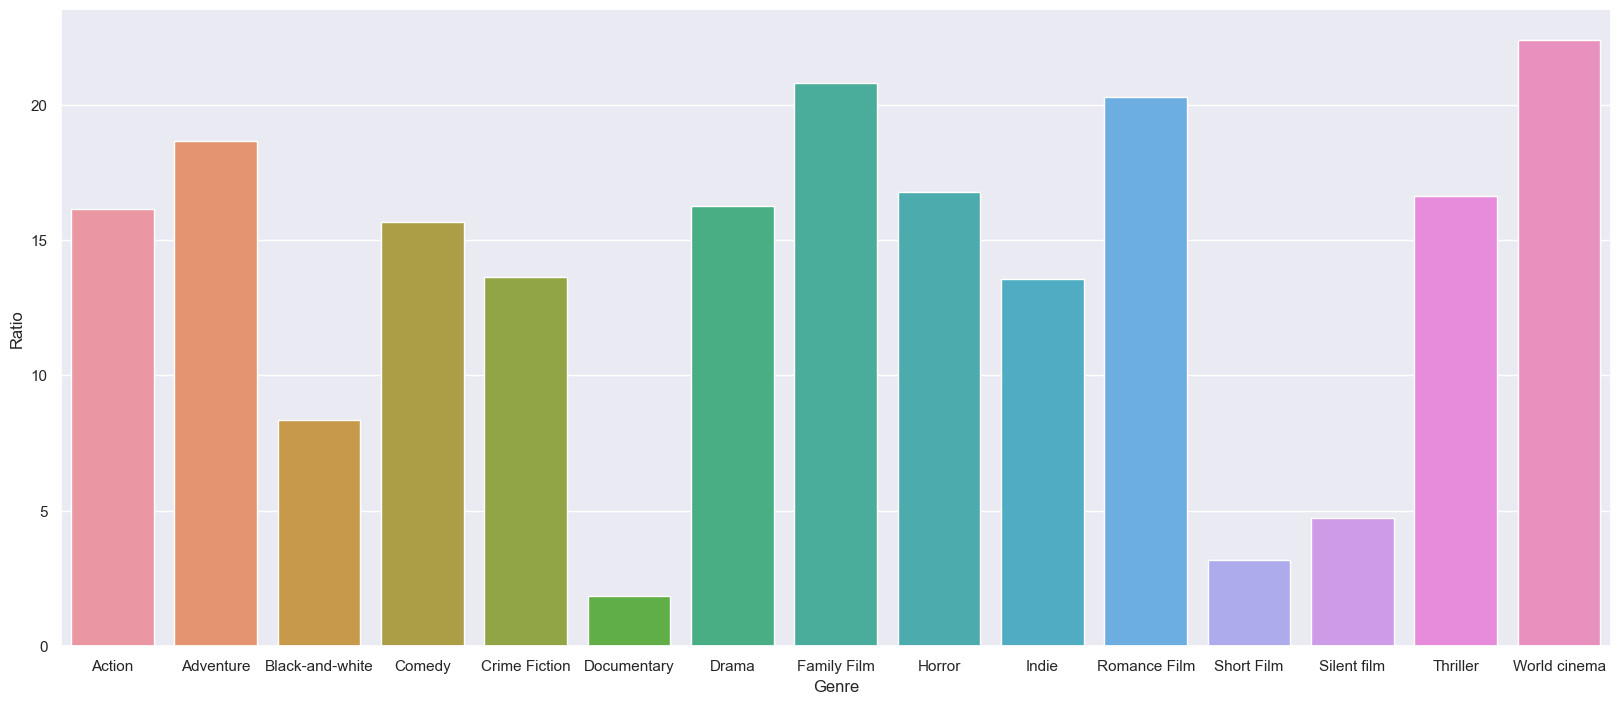

In [132]:
sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.barplot(x="Genre", y="Ratio", data=father.loc[father['Genre'].isin(father.sort_values(by="Movies", ascending=False).Genre.head(15))])